In [9]:
# Exercise: Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). 
# See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach 
# presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and 
# finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, 
# use early stopping, and plot learning curves using TensorBoard.

In [10]:
# Setup

In [11]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



import tensorflow as tf
from tensorflow import keras

In [12]:
# Loading the dataset & print its stats

In [13]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [14]:
# Print its type
X_train_full.dtype

dtype('uint8')

In [15]:
# split the full training set into a validation set and a (smaller) training set. 
# We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [17]:
# plot an image using Matplotlib's imshow() function, with a 'binary' color map.

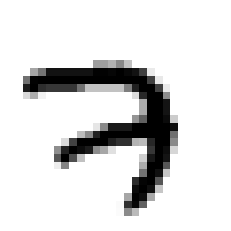

In [18]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [19]:
# The labels are the class IDs (represented as uint8), from 0 to 9. 
# Conveniently, the class IDs correspond to the digits represented in the images, 
# so we don't need a class_names array

In [20]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
# show the validation set

In [22]:
X_valid.shape

(5000, 28, 28)

In [23]:
# show the test set

In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
# look at a sample of the images in the dataset

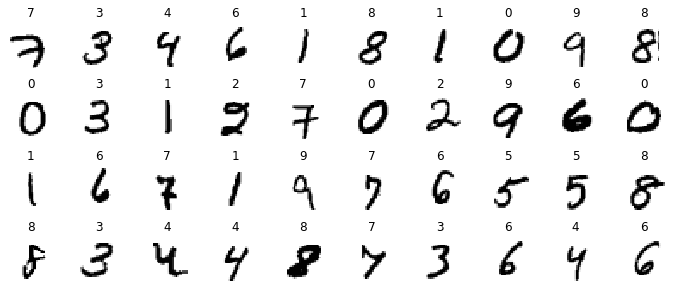

In [26]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# Simple dense network and find the optimal learning rate. Creating a callback to grow the learning rate at each iteration. It will also record the learning rate 
# and the loss at each iteration.

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])